<a href="https://colab.research.google.com/github/Hubert246/Data-Science-Bootcamp/blob/main/08_sieci_neuronowe/1_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.11.0


In [7]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [8]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [9]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [10]:
X_train = X_train / 255
X_test = X_test / 255

(-0.5, 27.5, 27.5, -0.5)

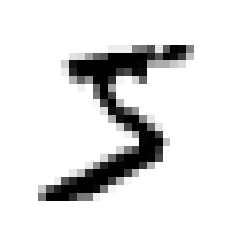

In [13]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

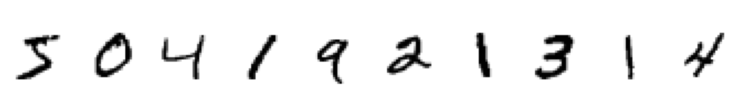

In [14]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2945 - accuracy: 0.9131
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1443 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0878 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0755 - accuracy: 0.9766


In [21]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0738 - accuracy: 0.9784 - 855ms/epoch - 3ms/step


[0.0738486647605896, 0.9783999919891357]

In [22]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.294530,0.913133
1,0.144275,0.956800
2,0.106615,0.967867
3,0.087791,0.973100
4,0.075550,0.976567


In [23]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

In [24]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[0.00000018194 , 0.000000007268, 0.000012040948, ..., 0.99974406    , 0.000000433321, 0.000007209196],
       [0.000000000274, 0.000012114613, 0.99998206    , ..., 0.            , 0.000000163699, 0.            ],
       [0.000000123541, 0.9991763     , 0.0002773283  , ..., 0.00035609692 , 0.00012693115 , 0.000000611265],
       ...,
       [0.000000000001, 0.000000000223, 0.000000000034, ..., 0.000002968779, 0.000001284399, 0.00006831584 ],
       [0.000000109478, 0.000000079136, 0.000000001203, ..., 0.000000011712, 0.0024353836  , 0.000000000905],
       [0.000000067511, 0.            , 0.000000007881, ..., 0.            , 0.000000000281, 0.000000000108]],
      dtype=float32)

In [25]:
y_pred = model.predict_classes(X_test)
y_pred

AttributeError: ignored